In [73]:
import torch
from torchtext import data
import re  
from torchtext import vocab
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
import csv
import pandas
import numpy as np
from pandas import *
filename = "IMDB Dataset.csv"
fields = []
rows = []
with open(filename, 'r') as csvfile:
    # creating a csv reader object
    csvreader = csv.reader(csvfile)
     
    # extracting field names through first row
    fields = next(csvreader)
 
    # extracting each data row one by one
    for row in csvreader:
        rows.append(row)
 
    # get total number of rows
    print("Total no. of rows: %d"%(csvreader.line_num))
# printing the field names
print('Field names are:' + ', '.join(field for field in fields))
 
# printing first 5 rows
print('\nFirst 5 rows are:\n')
for row in rows[:5]:
    # parsing each column of a row
    for col in row:
        print("%10s"%col,end=" "),
    print('\n')



Total no. of rows: 50001
Field names are:review, sentiment

First 5 rows are:

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never

In [74]:
data = read_csv("IMDB Dataset.csv")
reviews = data['review'].tolist()
labels = data['sentiment'].tolist()
print(label)

['positive', 'positive', 'positive', 'negative', 'positive', 'positive', 'positive', 'negative', 'negative', 'positive', 'negative', 'negative', 'negative', 'negative', 'positive', 'negative', 'positive', 'negative', 'positive', 'negative', 'positive', 'negative', 'positive', 'negative', 'negative', 'positive', 'positive', 'negative', 'negative', 'positive', 'positive', 'positive', 'negative', 'positive', 'negative', 'negative', 'negative', 'negative', 'positive', 'negative', 'negative', 'positive', 'negative', 'negative', 'positive', 'positive', 'negative', 'negative', 'positive', 'negative', 'positive', 'positive', 'positive', 'positive', 'negative', 'negative', 'negative', 'negative', 'positive', 'positive', 'negative', 'negative', 'positive', 'negative', 'negative', 'positive', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'positive', 'positive', 'negative', 'positive', 'positive', 'negative', 'negative', 'positive', 'positive', 'negative', 'negative', 'ne

In [75]:
from string import punctuation
print(punctuation)
all_reviews=list()
for text in reviews:
  text = text.lower()
  text = "".join([ch for ch in text if ch not in punctuation])
  all_reviews.append(text)
all_text = " ".join(all_reviews)
all_words = all_text.split()

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [76]:
from collections import Counter 
# Count all the words using Counter Method
count_words = Counter(all_words)
total_words=len(all_words)
sorted_words=count_words.most_common(total_words)
print("Top ten occuring words : "+str(sorted_words[:10]))


Top ten occuring words : [('the', 663815), ('and', 320663), ('a', 320517), ('of', 288382), ('to', 266773), ('is', 210161), ('in', 184861), ('it', 152899), ('i', 152092), ('this', 149405)]


In [77]:

vocab_to_int={w:i+1 for i,(w,c) in enumerate(sorted_words)}
print(vocab_to_int)

{'the': 1, 'and': 2, 'a': 3, 'of': 4, 'to': 5, 'is': 6, 'in': 7, 'it': 8, 'i': 9, 'this': 10, 'that': 11, 'br': 12, 'was': 13, 'as': 14, 'with': 15, 'for': 16, 'movie': 17, 'but': 18, 'film': 19, 'on': 20, 'not': 21, 'you': 22, 'are': 23, 'his': 24, 'have': 25, 'be': 26, 'he': 27, 'one': 28, 'its': 29, 'at': 30, 'all': 31, 'by': 32, 'an': 33, 'they': 34, 'from': 35, 'who': 36, 'so': 37, 'like': 38, 'or': 39, 'just': 40, 'her': 41, 'about': 42, 'if': 43, 'has': 44, 'out': 45, 'some': 46, 'there': 47, 'what': 48, 'good': 49, 'when': 50, 'more': 51, 'very': 52, 'my': 53, 'even': 54, 'no': 55, 'up': 56, 'would': 57, 'she': 58, 'time': 59, 'only': 60, 'which': 61, 'really': 62, 'their': 63, 'see': 64, 'were': 65, 'story': 66, 'had': 67, 'can': 68, 'me': 69, 'than': 70, 'we': 71, 'much': 72, 'well': 73, 'been': 74, 'get': 75, 'will': 76, 'other': 77, 'do': 78, 'great': 79, 'also': 80, 'into': 81, 'bad': 82, 'because': 83, 'people': 84, 'how': 85, 'most': 86, 'first': 87, 'him': 88, 'dont': 8

In [78]:
encoded_reviews=list()
for review in all_reviews:
  encoded_review=list()
  for word in review.split():
    if word not in vocab_to_int.keys():
      #if word is not available in vocab_to_int put 0 in that place
      encoded_review.append(0)
    else:
      encoded_review.append(vocab_to_int[word])
  encoded_reviews.append(encoded_review)

sequence_length=250
features=np.zeros((len(encoded_reviews), sequence_length), dtype=int)
for i, review in enumerate(encoded_reviews):
  review_len=len(review)
  if (review_len<=sequence_length):
    zeros=list(np.zeros(sequence_length-review_len))
    new=zeros+review
  else:
    new=review[:sequence_length]
features[i,:]=np.array(new)

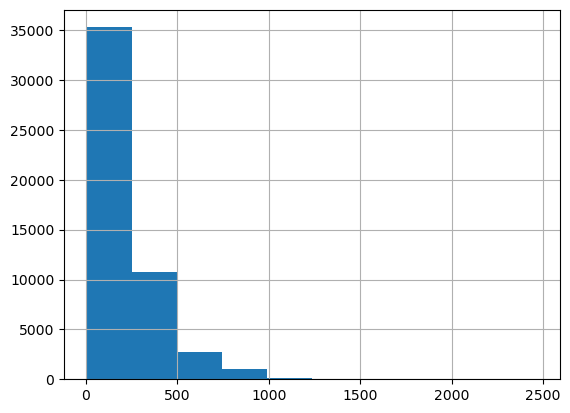

count    50000.000000
mean       230.258240
std        170.663887
min          4.000000
25%        126.000000
50%        172.000000
75%        280.000000
max       2469.000000
dtype: float64

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
encoded_reviews=encode_reviews(reviews)
review_len=[len(encoded_review) for encoded_review in encoded_reviews]
pd.Series(review_len).hist()
plt.show()
pd.Series(review_len).describe()


In [80]:
labels=[1 if label.strip()=='positive' else 0 for label in labels]

In [81]:
#split_dataset into 80% training , 10% test and 10% Validation Dataset
train_x=features[:int(0.8*len(features))]
train_y=labels[:int(0.8*len(features))]
valid_x=features[int(0.8*len(features)):int(0.9*len(features))]
valid_y=labels[int(0.8*len(features)):int(0.9*len(features))]
test_x=features[int(0.9*len(features)):]
test_y=labels[int(0.9*len(features)):]
print(len(train_y), len(valid_y), len(test_y))



40000 5000 5000


In [82]:
import torch
from torch.utils.data import DataLoader, TensorDataset

#create Tensor Dataset
train_data=TensorDataset(torch.FloatTensor(train_x), torch.FloatTensor(train_y))
valid_data=TensorDataset(torch.FloatTensor(valid_x), torch.FloatTensor(valid_y))
test_data=TensorDataset(torch.FloatTensor(test_x), torch.FloatTensor(test_y))

#dataloader
batch_size=50
train_loader=DataLoader(train_data, batch_size=batch_size, shuffle=True)
valid_loader=DataLoader(valid_data, batch_size=batch_size, shuffle=True)
test_loader=DataLoader(test_data, batch_size=batch_size, shuffle=True)



In [83]:
'''
# obtain one batch of training data
dataiter = iter(train_loader)
sample_x, sample_y = dataiter.next()
print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print('Sample label size: ', sample_y.size()) # batch_size
print('Sample label: \n', sample_y)
'''

"\n# obtain one batch of training data\ndataiter = iter(train_loader)\nsample_x, sample_y = dataiter.next()\nprint('Sample input size: ', sample_x.size()) # batch_size, seq_length\nprint('Sample input: \n', sample_x)\nprint('Sample label size: ', sample_y.size()) # batch_size\nprint('Sample label: \n', sample_y)\n"

In [84]:
import torch.nn as nn
 
class SentimentalLSTM(nn.Module):
    """
    The RNN model that will be used to perform Sentiment analysis.
    """
    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):    
        """
        Initialize the model by setting up the layers
        """
        super().__init__()
        self.output_size=output_size
        self.n_layers=n_layers
        self.hidden_dim=hidden_dim
        
        #Embedding and LSTM layers
        self.embedding=nn.Embedding(vocab_size, embedding_dim)
        self.lstm=nn.LSTM(embedding_dim, hidden_dim, n_layers, dropout=drop_prob, batch_first=True)
        
        #dropout layer
        self.dropout=nn.Dropout(0.3)
        
        #Linear and sigmoid layer
        self.fc1=nn.Linear(hidden_dim, 64)
        self.fc2=nn.Linear(64, 16)
        self.fc3=nn.Linear(16,output_size)
        self.sigmoid=nn.Sigmoid()
        
    def forward(self, x, hidden):
        """
        Perform a forward pass of our model on some input and hidden state.
        """
        batch_size=x.size()
        
        #Embadding and LSTM output
        embedd=self.embedding(x)
        lstm_out, hidden=self.lstm(embedd, hidden)
        
        #stack up the lstm output
        lstm_out=lstm_out.contiguous().view(-1, self.hidden_dim)
        
        #dropout and fully connected layers
        out=self.dropout(lstm_out)
        out=self.fc1(out)
        out=self.dropout(out)
        out=self.fc2(out)
        out=self.dropout(out)
        out=self.fc3(out)
        sig_out=self.sigmoid(out)
        
        sig_out=sig_out.view(batch_size, -1)
        sig_out=sig_out[:, -1]
        
        return sig_out, hidden
    
    def init_hidden(self, batch_size):
        """Initialize Hidden STATE"""
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data
        
        if (train_on_gpu):
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),
                  weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())
        else:
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())
        
        return hidden

In [86]:
# Instantiate the model w/ hyperparams
vocab_size = len(vocab_to_int)+1 # +1 for the 0 padding
output_size = 1
embedding_dim = 400
hidden_dim = 256
n_layers = 2

net = SentimentalLSTM(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)
print(net)

SentimentalLSTM(
  (embedding): Embedding(181686, 400)
  (lstm): LSTM(400, 256, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc1): Linear(in_features=256, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [88]:
# loss and optimization functions
lr=0.001

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)

# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

# training params

epochs = 3 # 3-4 is approx where I noticed the validation loss stop decreasing

counter = 0
print_every = 100
clip=5 # gradient clipping

# move model to GPU, if available
if(train_on_gpu):
    net.cuda()

net.train()
# train for some number of epochs
for e in range(epochs):
    # initialize hidden state
    h = net.init_hidden(batch_size)

    # batch loop
    for inputs, labels in train_loader:
        counter += 1

        if(train_on_gpu):
            inputs=inputs.cuda()
            labels=labels.cuda()
        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])

        # zero accumulated gradients
        net.zero_grad()

        # get the output from the model
        output, h = net(inputs, h)

        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(net.parameters(), clip)
        optimizer.step()

        # loss stats
        if counter % print_every == 0:
            # Get validation loss
            val_h = net.init_hidden(batch_size)
            val_losses = []
            net.eval()
            for inputs, labels in valid_loader:

                # Creating new variables for the hidden state, otherwise
                # we'd backprop through the entire training history
                val_h = tuple([each.data for each in val_h])

                inputs, labels = inputs.cuda(), labels.cuda()  
                output, val_h = net(inputs, val_h)
                val_loss = criterion(output.squeeze(), labels.float())

                val_losses.append(val_loss.item())

            net.train()
            print("Epoch: {}/{}...".format(e+1, epochs),
                  "Step: {}...".format(counter),
                  "Loss: {:.6f}...".format(loss.item()),
                  "Val Loss: {:.6f}".format(np.mean(val_losses)))

RuntimeError: Expected tensor for argument #1 'indices' to have one of the following scalar types: Long, Int; but got torch.cuda.FloatTensor instead (while checking arguments for embedding)

In [ ]:
test_losses = [] # track loss
    num_correct = 0

    # init hidden state
    h = net.init_hidden(batch_size)

    net.eval()
    # iterate over test data
    for inputs, labels in test_loader:

        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])

        if(train_on_gpu):
            inputs, labels = inputs.cuda(), labels.cuda()


        output, h = net(inputs, h)

        # calculate loss
        test_loss = criterion(output.squeeze(), labels.float())
        test_losses.append(test_loss.item())

        # convert output probabilities to predicted class (0 or 1)
        pred = torch.round(output.squeeze())  # rounds to the nearest integer

        # compare predictions to true label
        correct_tensor = pred.eq(labels.float().view_as(pred))
        correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
        num_correct += np.sum(correct)


    # -- stats! -- ##
    # avg test loss
    print("Test loss: {:.3f}".format(np.mean(test_losses)))

    # accuracy over all test data
    test_acc = num_correct/len(test_loader.dataset)
    print("Test accuracy: {:.3f}".format(test_acc))